## Logistic Regression

In [2]:
#Target values will always be discrete - yes/no, 1/0,true/false, male/female, sml,medium,large,xl,xxl,0-9

In [4]:
from scipy.io import arff # to import .arff file to a dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
%matplotlib inline
os.getcwd()

'/Users/Edureka'

In [5]:
data=arff.loadarff('Autism.arff')
autism=pd.DataFrame(data[0])

In [9]:
autism.sample(6)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
343,b'1',b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0',...,b'm',b'?',b'no',b'no',b'Jordan',b'no',2.0,b'18 and more',b'?',b'NO'
559,b'0',b'1',b'1',b'1',b'1',b'1',b'0',b'0',b'0',b'1',...,b'f',b'White-European',b'yes',b'no',b'United Kingdom',b'no',6.0,b'18 and more',b'Self',b'NO'
291,b'1',b'1',b'0',b'1',b'1',b'0',b'0',b'1',b'1',b'1',...,b'f',b'Black',b'no',b'no',b'Canada',b'no',7.0,b'18 and more',b'Self',b'YES'
562,b'0',b'1',b'0',b'1',b'0',b'1',b'1',b'0',b'1',b'1',...,b'f',b'Middle Eastern ',b'no',b'no',b'Iceland',b'no',6.0,b'18 and more',b'Parent',b'NO'
459,b'1',b'1',b'1',b'1',b'1',b'0',b'0',b'1',b'0',b'0',...,b'm',b'Latino',b'no',b'no',b'Ecuador',b'no',6.0,b'18 and more',b'Self',b'NO'
161,b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',...,b'f',b'South Asian',b'no',b'no',b'India',b'no',2.0,b'18 and more',b'Self',b'NO'


In [10]:
autism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           704 non-null object
A2_Score           704 non-null object
A3_Score           704 non-null object
A4_Score           704 non-null object
A5_Score           704 non-null object
A6_Score           704 non-null object
A7_Score           704 non-null object
A8_Score           704 non-null object
A9_Score           704 non-null object
A10_Score          704 non-null object
age                702 non-null float64
gender             704 non-null object
ethnicity          704 non-null object
jundice            704 non-null object
austim             704 non-null object
contry_of_res      704 non-null object
used_app_before    704 non-null object
result             704 non-null float64
age_desc           704 non-null object
relation           704 non-null object
Class/ASD          704 non-null object
dtypes: float64(2), object(19)
memory usage: 115.6+ KB


In [12]:
df_objects=autism.select_dtypes(include=['object'])
autism[df_objects.columns]=autism[df_objects.columns].apply(lambda x: x.str.decode('utf-8'))

In [13]:
autism.sample(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
573,1,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United Kingdom,no,10.0,18 and more,Self,YES
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7.0,18 and more,?,YES
27,0,0,0,0,0,0,0,1,0,0,...,m,Middle Eastern,yes,yes,Afghanistan,no,1.0,18 and more,Parent,NO
411,0,1,0,1,0,0,0,1,0,0,...,m,Middle Eastern,no,no,United Arab Emirates,no,3.0,18 and more,Self,NO
523,1,1,0,1,1,1,0,0,0,1,...,m,Black,yes,yes,United States,no,6.0,18 and more,Parent,NO


In [14]:
autism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           704 non-null object
A2_Score           704 non-null object
A3_Score           704 non-null object
A4_Score           704 non-null object
A5_Score           704 non-null object
A6_Score           704 non-null object
A7_Score           704 non-null object
A8_Score           704 non-null object
A9_Score           704 non-null object
A10_Score          704 non-null object
age                702 non-null float64
gender             704 non-null object
ethnicity          704 non-null object
jundice            704 non-null object
austim             704 non-null object
contry_of_res      704 non-null object
used_app_before    704 non-null object
result             704 non-null float64
age_desc           704 non-null object
relation           704 non-null object
Class/ASD          704 non-null object
dtypes: float64(2), object(19)
memory usage: 115.6+ KB


In [15]:
autism['A1_Score'].unique()

array(['1', '0'], dtype=object)

In [16]:
autism.loc[:,autism.columns.str.startswith('A')]=autism.loc[:,autism.columns.str.startswith('A')].astype('int64')

In [17]:
autism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           704 non-null int64
A2_Score           704 non-null int64
A3_Score           704 non-null int64
A4_Score           704 non-null int64
A5_Score           704 non-null int64
A6_Score           704 non-null int64
A7_Score           704 non-null int64
A8_Score           704 non-null int64
A9_Score           704 non-null int64
A10_Score          704 non-null int64
age                702 non-null float64
gender             704 non-null object
ethnicity          704 non-null object
jundice            704 non-null object
austim             704 non-null object
contry_of_res      704 non-null object
used_app_before    704 non-null object
result             704 non-null float64
age_desc           704 non-null object
relation           704 non-null object
Class/ASD          704 non-null object
dtypes: float64(2), int64(10), object(9)
memory usage: 115.6+ KB


In [18]:
autism.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO
5,1,1,1,1,1,0,1,1,1,1,...,m,Others,yes,no,United States,no,9.0,18 and more,Self,YES
6,0,1,0,0,0,0,0,1,0,0,...,f,Black,no,no,United States,no,2.0,18 and more,Self,NO
7,1,1,1,1,0,0,0,0,1,0,...,m,White-European,no,no,New Zealand,no,5.0,18 and more,Parent,NO
8,1,1,0,0,1,0,0,1,1,1,...,m,White-European,no,no,United States,no,6.0,18 and more,Self,NO
9,1,1,1,1,0,1,1,1,1,0,...,m,Asian,yes,yes,Bahamas,no,8.0,18 and more,Health care professional,YES


In [19]:
cols=autism.isin(['?']).columns

In [20]:
cols

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [21]:
autism=autism[cols].replace({'?':np.nan})

In [22]:
autism.isin(['?']).columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [23]:
autism.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2.0,18 and more,NaN,NO
5,1,1,1,1,1,0,1,1,1,1,...,m,Others,yes,no,United States,no,9.0,18 and more,Self,YES
6,0,1,0,0,0,0,0,1,0,0,...,f,Black,no,no,United States,no,2.0,18 and more,Self,NO
7,1,1,1,1,0,0,0,0,1,0,...,m,White-European,no,no,New Zealand,no,5.0,18 and more,Parent,NO
8,1,1,0,0,1,0,0,1,1,1,...,m,White-European,no,no,United States,no,6.0,18 and more,Self,NO
9,1,1,1,1,0,1,1,1,1,0,...,m,Asian,yes,yes,Bahamas,no,8.0,18 and more,Health care professional,YES


In [24]:
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
autism.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

In [26]:
autism.iloc[:,[10,12,19]]=imputer.fit_transform(autism.iloc[:,[10,12,19]])

In [27]:
autism.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [28]:
autism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           704 non-null int64
A2_Score           704 non-null int64
A3_Score           704 non-null int64
A4_Score           704 non-null int64
A5_Score           704 non-null int64
A6_Score           704 non-null int64
A7_Score           704 non-null int64
A8_Score           704 non-null int64
A9_Score           704 non-null int64
A10_Score          704 non-null int64
age                704 non-null float64
gender             704 non-null object
ethnicity          704 non-null object
jundice            704 non-null object
austim             704 non-null object
contry_of_res      704 non-null object
used_app_before    704 non-null object
result             704 non-null float64
age_desc           704 non-null object
relation           704 non-null object
Class/ASD          704 non-null object
dtypes: float64(2), int64(10), object(9)
memory usage: 115.6+ KB


In [29]:
categorical=[c for c in autism.columns if autism.dtypes[c]=='object']
continous=[c for c in autism.columns if autism.dtypes[c]!='object']

In [30]:
autism[categorical]=autism[categorical].apply(lambda x: LabelEncoder().fit_transform(x))

In [31]:
autism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           704 non-null int64
A2_Score           704 non-null int64
A3_Score           704 non-null int64
A4_Score           704 non-null int64
A5_Score           704 non-null int64
A6_Score           704 non-null int64
A7_Score           704 non-null int64
A8_Score           704 non-null int64
A9_Score           704 non-null int64
A10_Score          704 non-null int64
age                704 non-null float64
gender             704 non-null int64
ethnicity          704 non-null int64
jundice            704 non-null int64
austim             704 non-null int64
contry_of_res      704 non-null int64
used_app_before    704 non-null int64
result             704 non-null float64
age_desc           704 non-null int64
relation           704 non-null int64
Class/ASD          704 non-null int64
dtypes: float64(2), int64(19)
memory usage: 115.6 KB


In [32]:
autism['Class/ASD'].head()

0    0
1    0
2    1
3    0
4    0
Name: Class/ASD, dtype: int64

In [33]:
target=autism['Class/ASD']
features=autism.drop('Class/ASD',axis=1)

In [62]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.3,random_state=9876)

In [63]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((492, 20), (492,), (212, 20), (212,))

In [64]:
gm=LogisticRegression(max_iter=500)

In [65]:
lgregressor=gm.fit(xtrain,ytrain)

In [66]:
lg_predict=gm.predict(xtest)

In [67]:
lg_predict

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0])

In [68]:
predict_prob_values=lgregressor.predict_proba(xtest)[:,1]

In [69]:
cm=confusion_matrix(ytest,lg_predict)

In [70]:
cm

array([[140,   0],
       [  0,  72]])

In [71]:
acc=accuracy_score(ytest,lg_predict)
acc

1.0

In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc=roc_auc_score(ytest,lg_predict)

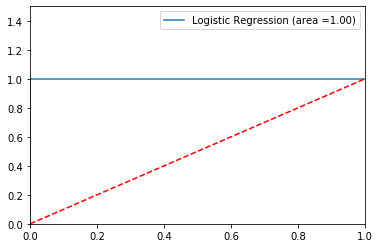

In [61]:
fpr,tpr,thresholds=roc_curve(ytest,predict_prob_values)
plt.plot(fpr,tpr,label='Logistic Regression (area =%0.2f)' %roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.5])
plt.legend()
plt.show()